In [29]:
import geopandas as gpd

africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        10000001          0  10000001       0.89         0.0         7.2   
1        10000002          0  10000002       2.90         0.0         7.0   
2        10000003   10000009  10000009       4.63         5.7         9.8   
3        10000004   10000009  10000009       0.69         5.7         5.4   
4        10000005          0  10000005       8.32         0.0        13.6   
...           ...        ...       ...        ...         ...         ...   
1527546  11527547          0  11527547       3.11         0.0        20.9   
1527547  11527548          0  11527548       2.48         0.0         8.3   
1527548  11527549          0  11527549       0.69         0.0         6.1   
1527549  11527550   11527540  11527539       7.07        18.4        11.2   
1527550  11527551          0  11527551       4.99         0.0         9.5   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [30]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\AdamS\anaconda3\envs\analysis\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\AdamS\anaconda3\envs\analysis\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [31]:
print(africa_lakes)

    featurecla  scalerank             name       name_abb       name_alt  \
475       Lake          0      Lake Albert      L. Albert           None   
476       Lake          0      Lake Malawi      L. Malawi     Lake Nyasa   
477       Lake          0  Lake Tanganyika  L. Tanganyika           None   
478       Lake          0    Lake Victoria    L. Victoria           None   
479       Lake          1        Lake Chad        L. Chad           None   
482       Lake          1        Lake Tana        L. Tana           None   
491       Lake          3        Lac Moeru       L. Moeru     Lake Mweru   
499       Lake          4   Lake Bangweulu   L. Bangweulu           None   
502       Lake          4        Lake Kivu        L. Kivu           None   
503       Lake          4      Lake Edward      L. Edward           None   
544       Lake          5       Lake Kyoga       L. Kyoga           None   
545       Lake          5       Lake Rukwa       L. Rukwa           None   
561       La

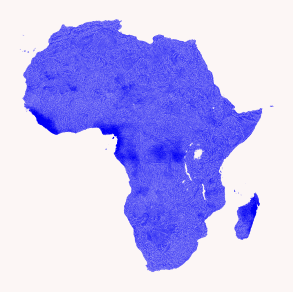

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

africa_rivers.plot(ax=ax, color='blue', lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF', alpha=1)

ax.axis('off')

plt.savefig("outputs/raw1.png", dpi=600, bbox_inches='tight')
plt.show()

In [5]:
basins = gpd.read_file("../../Nature/rivers/data/basins/africa/hydrobasins_africa.shp")
print(basins)

      SUB_BAS  TO_BAS  MAJ_BAS       SUB_NAME            MAJ_NAME  SUB_AREA  \
0       90002    -888     7009         Borkou           Lake Chad   1179610   
1       30003   30272     7003   White Nile 5                Nile     97222   
2       90008    -888     7009         Dillia           Lake Chad    162385   
3       30029   30297     7003  Lake Victoria                Nile     69200   
4      100030    -888     7010     Lake Rukwa         Rift Valley      3443   
...       ...     ...      ...            ...                 ...       ...   
1445   153931    -999     7015        Comoros          Madasgacar      2257   
1446   153931    -999     7015        Comoros          Madasgacar      2257   
1447   220781    -999     7022        Cross 1      Gulf of Guinea     51730   
1448   210977    -999     7021         Saloum  Africa, West Coast     41540   
1449   210974    -999     7021       Scarcies  Africa, West Coast     29461   

      MAJ_AREA  LEGEND                             

In [6]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

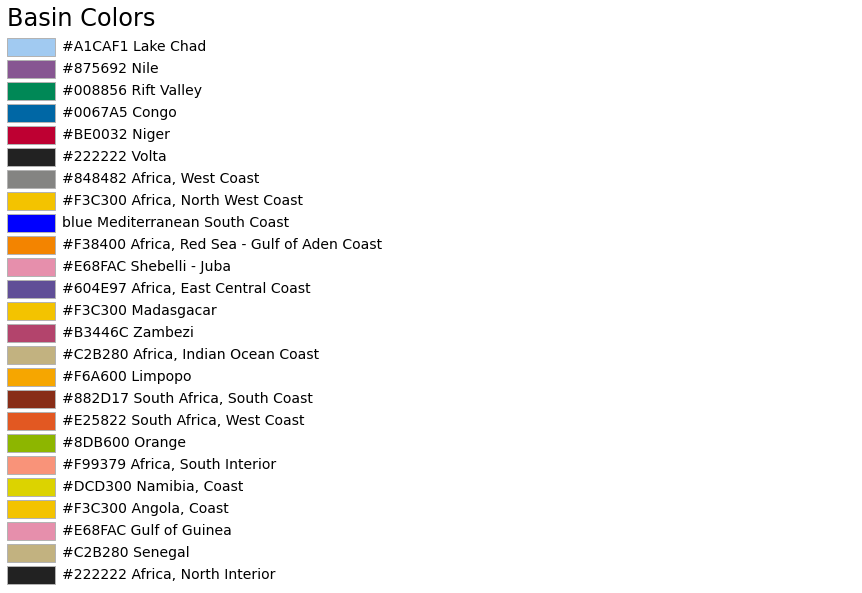

In [7]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )
plt.savefig("outputs/raw2.png", dpi=600, bbox_inches='tight')

C:\Users\AdamS\anaconda3\envs\analysis\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


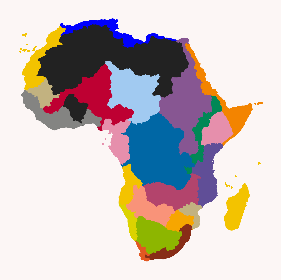

In [8]:
basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=basins['colors'])
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/basins.png", dpi=600, bbox_inches='tight')

In [9]:
rivers_basins = gpd.sjoin(africa_rivers, basins, op='within')

C:\Users\AdamS\anaconda3\envs\analysis\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


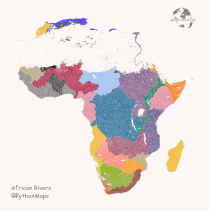

In [17]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=0.1)
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

logo = plt.imread('../../Branding/globe.png')
newax = fig.add_axes([0.77, 0.6, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.savefig("outputs/raw3.png", dpi=600, bbox_inches='tight')
plt.show()

In [22]:
print(rivers_basins)

           cat    AREA  UP_CELLS  DISCHARGE  WIDTH  WIDTH5  WIDTH95  DEPTH  \
0            1   24.56       142       0.55   5.32    1.94    14.74   0.21   
1            2   34.98       199       0.79   6.38    2.32    17.81   0.25   
2            3   97.00       566       2.25  10.80    3.84    30.78   0.37   
3            4   74.98       111       1.72   9.45    3.38    26.81   0.33   
4            5  408.69       106       9.91  22.66    7.82    66.56   0.66   
...        ...     ...       ...        ...    ...     ...      ...    ...   
515236  515237   47.70       225       0.31   3.99    1.47    10.92   0.17   
515237  515238   47.70       225       0.31   3.99    1.47    10.92   0.17   
515250  515251   26.43       126       0.17   2.99    1.12     8.10   0.14   
551167  551168   67.06       317       0.43   4.70    1.73    12.98   0.19   
534379  534380   24.21       111       0.16   2.86    1.07     7.74   0.13   

        DEPTH5  DEPTH95  ...                              MAJ_N

In [27]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = 0.6 - 0.005
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = 0.005 + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DISCHARGE', min_value=0.005, max_value=0.1)
rivers_basins = scale_lw(rivers_basins, 'WIDTH', min_value=0.005, max_value=0.1)
rivers_basins = scale_lw(rivers_basins, 'DEPTH', min_value=0.005, max_value=0.1)
rivers_basins = scale_lw(rivers_basins, 'AREA', min_value=0.005, max_value=0.1)

rivers_basins['LW_COMBINED'] = rivers_basins['LW_AREA'] + rivers_basins['LW_DISCHARGE'] + rivers_basins['LW_WIDTH'] + rivers_basins['LW_DEPTH']

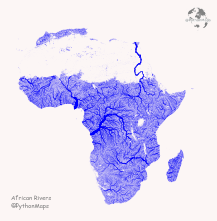

In [28]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_COMBINED'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

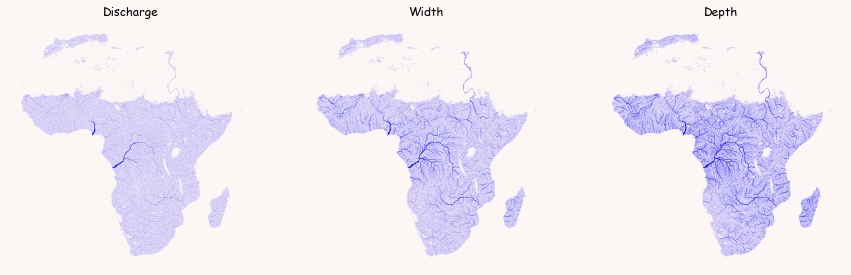

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 7)

ax1 = plt.subplot(1,3,1)
rivers_basins.plot(ax=ax1, color='blue', lw=rivers_basins['LW_DISCHARGE'])
africa_lakes.plot(ax=ax1, color='#FCF6F5FF')
ax1.set_title("Discharge", fontfamily='fantasy')
ax1.axis('off')

ax2 = plt.subplot(1,3,2)
rivers_basins.plot(ax=ax2, color='blue', lw=rivers_basins['LW_WIDTH'])
africa_lakes.plot(ax=ax2, color='#FCF6F5FF')
ax2.set_title("Width", fontfamily='fantasy')
ax2.axis('off')

ax3 = plt.subplot(1,3,3)
rivers_basins.plot(ax=ax3, color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax3, color='#FCF6F5FF')
ax3.set_title("Depth", fontfamily='fantasy')
ax3.axis('off')

plt.savefig("outputs/raw4.png", dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-13-14f06556cc55>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


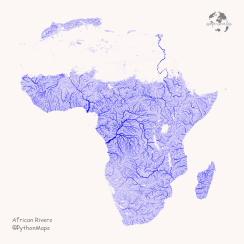

In [13]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw5.png", dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-14-e23bcd0d37b8>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


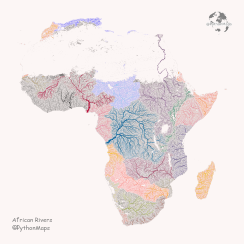

In [14]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DEPTH'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes,
              fontfamily='fantasy')

ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/raw6.png", dpi=600, bbox_inches='tight')
plt.show()